/*Momentum Descent*/

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.model_selection import train_test_split as tts;
#print("Zebra");

Zebra


In [ ]:
# Loading Dataframe and Converting It to NumPy aray
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
];
full_data = pd.read_csv(
    r"F:\Personal Projects\ML-and-DL-Optimisation-Methods\Datasets\housing.csv",
    sep=r'\s+', header=None, names=column_names, encoding="utf-8", engine='python'
);
data_matrix = full_data.to_numpy();
#print(data_matrix);
m,n = data_matrix.shape;
#print(m,n);
X,Y = data_matrix[:,0:n-1], data_matrix[:,-1].reshape((m,1));
ones = np.ones((m,1));
X=np.hstack((ones,X)); # Design Matrix Creation
#print(X.shape)
X_train, X_test, Y_train, Y_test = tts(X,Y, train_size=0.8, random_state=42);
#print(X_train.shape)

(404, 14)


In [72]:
# Loading Dataframe and Converting It to NumPy array
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
];
full_data = pd.read_csv(
    r"F:\Personal Projects\ML-and-DL-Optimisation-Methods\Datasets\housing.csv",
    sep=r'\s+', header=None, names=column_names, encoding="utf-8", engine='python'
);

data_matrix = full_data.to_numpy();
m, n = data_matrix.shape;

# 1. Separate Features and Target
X_raw = data_matrix[:, 0:n-1]
Y = data_matrix[:, -1].reshape((m, 1))

# 2. FEATURE SCALING (Standardization)
# We subtract the mean and divide by the standard deviation for each column
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_scaled = (X_raw - X_mean) / X_std

# 3. Design Matrix Creation (Add the ones column AFTER scaling)
ones = np.ones((m, 1))
X = np.hstack((ones, X_scaled)) 

# 4. Train/Test Split
# Using the same random_state to keep your test set consistent
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=0.8, random_state=42)

print(f"Data scaled. X_train shape: {X_train.shape}")

Data scaled. X_train shape: (404, 14)


In [73]:
# Initialisations
beta = 0.9;
step_size = 0.001;
theta = np.zeros((n,1));
v = np.zeros((n,1));

In [74]:
# Storing
'''
thetas = [];
errors = [];
predictions = [];
losses = []; 
'''

'\nthetas = [];\nerrors = [];\npredictions = [];\nlosses = []; \n'

In [103]:
# Momentum Descent Algorithm

def MomDesc(X,Y,beta = 0.99, step_size = 0.001, iterations=5000):
    # Storing
    thetas = [];
    errors = [];
    predictions = [];
    gradients = [];
    velocities = [];
    losses = [];

    m,n = X.shape;
    Y = Y.reshape(-1,1);
    # Initialisation
    theta = np.zeros((n,1));
    v = np.zeros((n,1));

    thetas.append(theta.copy());
    velocities.append(v.copy());

    for i in range(iterations):
        
        Y_pred = X@theta;
        predictions.append(Y_pred);
        e = Y_pred-Y;
        errors.append(e);
        grad = (1/m)*((X.T)@e);
        gradients.append(grad);
        loss = (1/(2*m))*(e.T@e);
        losses.append(loss.item());
    
        # Updates
        v = beta*v + (1-beta)*grad;
        theta = theta - step_size*v;

        velocities.append(v.copy());
        thetas.append(theta.copy());

    print(theta);
    
    return theta, thetas, errors, gradients, losses, predictions, velocities;

In [104]:
theta, thetas, errors, gradients, losses, predictions, velocities = MomDesc(X_train,Y_train, step_size=0.05, iterations=50000);

[[22.48526824]
 [-0.97149423]
 [ 0.70155562]
 [ 0.27675212]
 [ 0.70653152]
 [-1.99143043]
 [ 3.11571836]
 [-0.17706021]
 [-3.04577065]
 [ 2.28278471]
 [-1.79260468]
 [-1.97995351]
 [ 1.12649864]
 [-3.62814937]]


In [105]:
def final_predictions_and_scoring(X, Y, theta):
    fin_pred = X @ theta
    fin_error = fin_pred - Y
    
    mae = np.mean(np.abs(fin_error))
    mse = np.mean(np.square(fin_error)) # Fixed
    rmse = np.sqrt(mse)
    
    # R2 Score
    SSres = np.sum(fin_error**2)
    SStot = np.sum((Y - np.mean(Y))**2)
    R2 = 1 - (SSres / SStot)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {R2:.4f}")

    return mae, mse, R2

In [108]:
mae, mse, R2 = final_predictions_and_scoring(X_test, Y_test, theta);

MAE:  3.1891
MSE:  24.2911
RMSE: 4.9286
R2:   0.6688


In [ ]:
# Let's go over plotting

303.277698019802 10.820706376613158
10.820706376613153


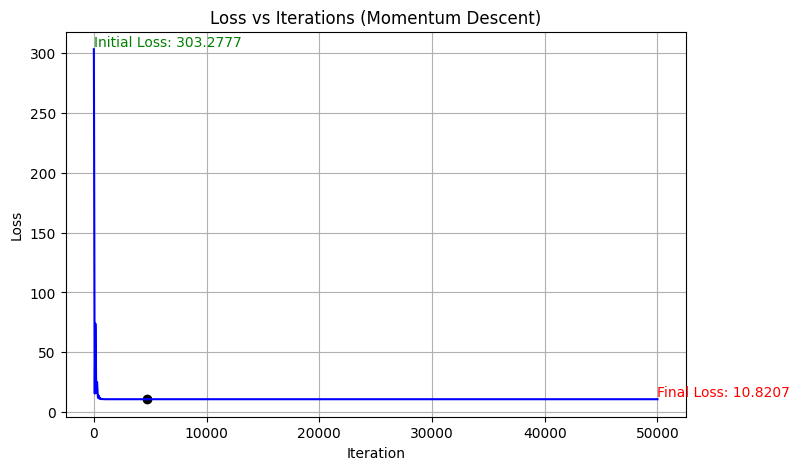

In [ ]:

print(losses[0], losses[-1]);
loss_array = np.array(losses);
initial_loss = losses[0];
final_loss = losses[-1];
min_loss = np.argmin(loss_array);

plt.figure(figsize=(8,5))
plt.plot(losses, color='blue')
plt.title("Loss vs Iterations (Momentum Descent)")
# Annotate initial loss
plt.text(0, initial_loss, f'Initial Loss: {initial_loss:.4f}', 
         fontsize=10, color='green', verticalalignment='bottom');

plt.text(len(loss_array)-1, final_loss, f'Final Loss: {final_loss:.4f}', 
         fontsize=10, color='red', verticalalignment='bottom');

print(loss_array[min_loss]);
plt.scatter(min_loss, loss_array[min_loss], color="black");

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


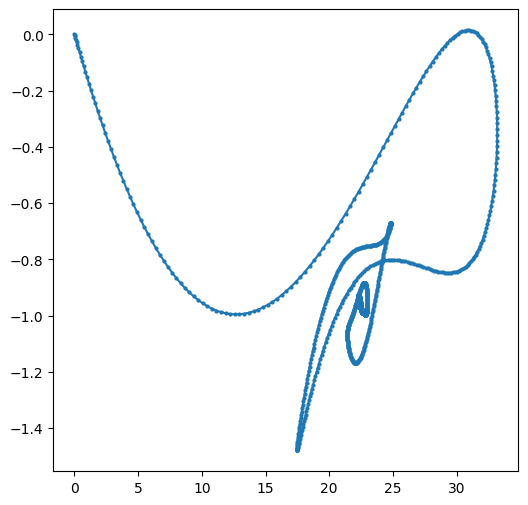

In [138]:
# Theta Relation Plotting
thetas_numpied = np.array(thetas);
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))  # square plot for clarity
plt.plot(thetas_numpied[:,0], thetas_numpied[:,1], marker='o', markersize=2, linestyle='-');

#plt.plot(thetas_numpied[:,1], thetas_numpied[:,2], marker='o', markersize=2, linestyle='-');
